<b>Objective: Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.</b>

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [242]:
#Import CSVs into dataframes: takehome_users.csv
users_df = pd.read_csv('takehome_users.csv', parse_dates=['creation_time'])
display(users_df)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [243]:
#takehome_user_engagement.csv
eng_df = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])
display(eng_df)
print(eng_df.head())

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


           time_stamp  user_id  visited
0 2014-04-22 03:53:30        1        1
1 2013-11-15 03:45:04        2        1
2 2013-11-29 03:45:04        2        1
3 2013-12-09 03:45:04        2        1
4 2013-12-25 03:45:04        2        1


In [244]:
print(eng_df['visited'].unique()) #All values are 1

[1]


In [245]:
#Calculate number of rolling 7-day visits per user
eng_df_grouped = eng_df.set_index('time_stamp')
eng_df_grouped = eng_df_grouped.groupby('user_id').rolling('7D').sum()
display(eng_df_grouped.head(10))

user_id  visited
user_id time_stamp                           
1       2014-04-22 03:53:30      1.0      1.0
2       2013-11-15 03:45:04      2.0      1.0
        2013-11-29 03:45:04      2.0      1.0
        2013-12-09 03:45:04      2.0      1.0
        2013-12-25 03:45:04      2.0      1.0
        2013-12-31 03:45:04      4.0      2.0
        2014-01-08 03:45:04      2.0      1.0
        2014-02-03 03:45:04      2.0      1.0
        2014-02-08 03:45:04      4.0      2.0
        2014-02-09 03:45:04      6.0      3.0

In [246]:
#Identify adopted users
adopted_df = eng_df_grouped[eng_df_grouped['visited'] >= 3.0]
print(adopted_df.head())

                             user_id  visited
user_id time_stamp                           
2       2014-02-09 03:45:04      6.0      3.0
        2014-02-13 03:45:04      6.0      3.0
10      2013-02-19 22:08:03     30.0      3.0
        2013-03-02 22:08:03     30.0      3.0
        2013-03-05 22:08:03     30.0      3.0


In [247]:
#Get adopted user ids as list
adopted = np.unique(adopted_df.index.get_level_values(0).values)
print(adopted)
print(len(adopted))

[    2    10    20 ... 11969 11975 11988]
1602


In [248]:
def fill_adopted_status(row):
    return True if row['object_id'] in adopted else False

In [249]:
#Add column to users_df (will be target column for ML model)
users_df['has_adopted'] = users_df.apply(func=fill_adopted_status, axis=1)
print(users_df.head())

   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2    

In [250]:
#Perform some EDA
print(users_df.isna().any())

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
has_adopted                   False
dtype: bool


In [251]:
users_src = users_df.groupby(['creation_source', 'has_adopted']).size().unstack(level=1)
print(users_src.head())

has_adopted         False  True 
creation_source                 
GUEST_INVITE         1803    360
ORG_INVITE           3701    553
PERSONAL_PROJECTS    1947    164
SIGNUP               1794    293
SIGNUP_GOOGLE_AUTH   1153    232


In [252]:
users_src_pct = users_src.divide(users_source.sum(axis=1), axis=0) * 100
print(users_src_pct)

has_adopted             False      True 
creation_source                         
GUEST_INVITE        83.356449  16.643551
ORG_INVITE          87.000470  12.999530
PERSONAL_PROJECTS   92.231170   7.768830
SIGNUP              85.960709  14.039291
SIGNUP_GOOGLE_AUTH  83.249097  16.750903


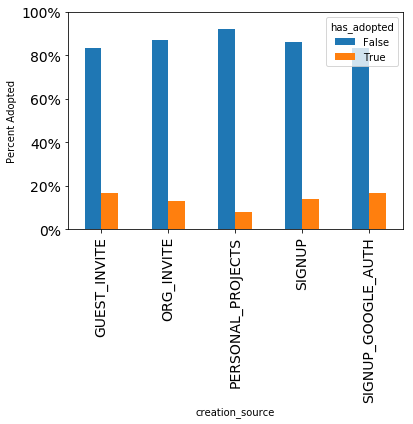

In [253]:
ax = users_src_pct.plot(kind='bar', yticks=[0, 20, 40, 60, 80, 100], fontsize=14)
ax.set_ylabel('Percent Adopted')
ax.set_yticklabels([(str(x) + '%') for x in ax.get_yticks()])
plt.show() #Creation source doesn't seem to make much difference

In [254]:
users_mail = users_df.groupby(['opted_in_to_mailing_list', 'has_adopted']).size().unstack(level=1)
users_mail_pct = users_mail.divide(users_mail.sum(axis=1), axis=0) * 100
print(users_mail_pct)

has_adopted                   False      True 
opted_in_to_mailing_list                      
0                         86.808794  13.191206
1                         86.172345  13.827655


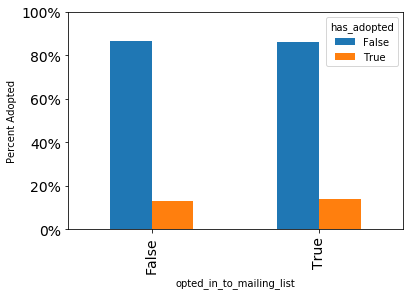

In [255]:
ax = users_mail_pct.plot(kind='bar', yticks=[0, 20, 40, 60, 80, 100], fontsize=14)
ax.set_ylabel('Percent Adopted')
ax.set_xticklabels(['False', 'True'])
ax.set_yticklabels([(str(x) + '%') for x in ax.get_yticks()])
plt.show() #Mailing list doesn't seem to make much difference

In [256]:
users_drip = users_df.groupby(['enabled_for_marketing_drip', 'has_adopted']).size().unstack(level=1)
users_drip_pct = users_drip.divide(users_drip.sum(axis=1), axis=0) * 100
print(users_drip_pct)

has_adopted                     False      True 
enabled_for_marketing_drip                      
0                           86.716301  13.283699
1                           86.272321  13.727679


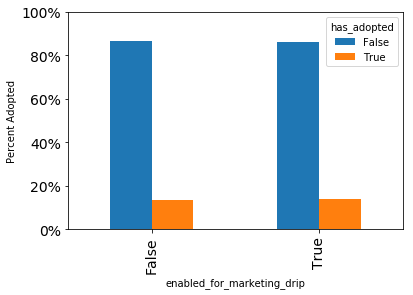

In [257]:
ax = users_drip_pct.plot(kind='bar', yticks=[0, 20, 40, 60, 80, 100], fontsize=14)
ax.set_ylabel('Percent Adopted')
ax.set_xticklabels(['False', 'True'])
ax.set_yticklabels([(str(x) + '%') for x in ax.get_yticks()])
plt.show() #Marketing drip doesn't seem to make a difference

How to handle invited_by_user_id column... First determine whether inviting seems to matter at all. Then consider if WHICH user invites matters

In [258]:
users_df['was_invited'] = (users_df['invited_by_user_id'].isna() == False)

In [259]:
users_df.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,has_adopted,was_invited
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,False,True
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,False,False
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,False,True
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,False,False
11999,12000,2014-01-26 08:57:12,Lima Tha�s,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN,False,False


In [260]:
users_inv = users_df.groupby(['was_invited', 'has_adopted']).size().unstack(level=1)
users_inv_pct = users_inv.divide(users_inv.sum(axis=1), axis=0) * 100
print(users_inv_pct)

has_adopted      False      True 
was_invited                      
False        87.658965  12.341035
True         85.772168  14.227832


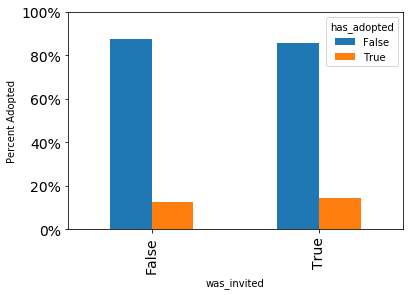

In [261]:
ax = users_inv_pct.plot(kind='bar', yticks=[0, 20, 40, 60, 80, 100], fontsize=14)
ax.set_ylabel('Percent Adopted')
ax.set_xticklabels(['False', 'True'])
ax.set_yticklabels([(str(x) + '%') for x in ax.get_yticks()])
plt.show() #Being invited doesn't seem to make a difference

In [262]:
import seaborn as sns

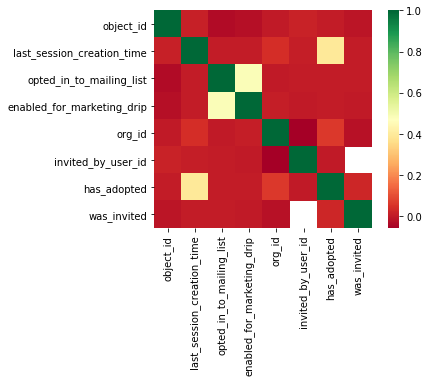

In [263]:
sns.heatmap(users_df.corr(), square=True, cmap='RdYlGn')
#Out of the numerical features, user adoption seems to only correlate much with last_session_creation_time

In [264]:
users_invited = users_df.groupby(['invited_by_user_id', 'has_adopted']).size().unstack(level=1)
print(users_invited)

has_adopted         False  True 
invited_by_user_id              
3.0                   1.0    NaN
7.0                   5.0    NaN
10.0                  1.0    NaN
21.0                  1.0    NaN
23.0                  3.0    NaN
29.0                  NaN    1.0
37.0                  5.0    NaN
47.0                  6.0    NaN
49.0                  NaN    1.0
50.0                  6.0    1.0
55.0                  4.0    NaN
69.0                  4.0    NaN
78.0                  5.0    NaN
79.0                  NaN    1.0
93.0                  2.0    NaN
103.0                 1.0    NaN
108.0                 1.0    NaN
116.0                 3.0    1.0
120.0                 2.0    NaN
121.0                 7.0    NaN
129.0                 1.0    NaN
130.0                 2.0    NaN
131.0                 1.0    NaN
134.0                 1.0    NaN
137.0                 4.0    1.0
143.0                 1.0    NaN
147.0                 2.0    NaN
149.0                 2.0    1.0
153.0     

In [265]:
print(users_invited.max())

has_adopted
False    12.0
True      4.0
dtype: float64


In [266]:
print(users_invited[users_invited.loc[:, False] == 12.0]) #If this guy invites you, you probably won't adopt...
print(users_invited[users_invited.loc[:, True] == 4.0]) #60/40 for this one

has_adopted         False  True 
invited_by_user_id              
10741.0              12.0    1.0
has_adopted         False  True 
invited_by_user_id              
2354.0                6.0    4.0
10628.0               6.0    4.0


<i>To prevent model over-complexity caused by dummying ever user in invited_by_user_id, will exclude column and just use was_invited column. Will keep org_id though because many fewer values and some very small correlation with has_adopted found.</i>

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale

Prepare data for the model.

In [268]:
#Convert creation time to unix time difference like last_session_creation_time
users_df['creation_time'] = users_df['creation_time'].astype(np.int64) // 10**9
print(users_df.head())

   object_id  creation_time               name                       email  \
0          1     1398138810     Clausen August    AugustCClausen@yahoo.com   
1          2     1384487104      Poole Matthew      MatthewPoole@gustr.com   
2          3     1363734892  Bottrill Mitchell  MitchellBottrill@gustr.com   
3          4     1369123768    Clausen Nicklas   NicklasSClausen@yahoo.com   
4          5     1358417660          Raw Grace          GraceRaw@yahoo.com   

  creation_source  last_session_creation_time  opted_in_to_mailing_list  \
0    GUEST_INVITE                1.398139e+09                         1   
1      ORG_INVITE                1.396238e+09                         0   
2      ORG_INVITE                1.363735e+09                         0   
3    GUEST_INVITE                1.369210e+09                         0   
4    GUEST_INVITE                1.358850e+09                         0   

   enabled_for_marketing_drip  org_id  invited_by_user_id  has_adopted  \
0     

In [269]:
#Convert org_id to category
users_df['org_id'] = users_df['org_id'].astype('category')
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null int64
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null category
invited_by_user_id            6417 non-null float64
has_adopted                   12000 non-null bool
was_invited                   12000 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 914.0+ KB
None


In [270]:
#Fill in missing values in last_session_creation_time column
#If this value is NaN, assume user has never logged in => set to value of creation_time
users_df['last_session_creation_time'] = users_df['last_session_creation_time'].fillna(users_df['creation_time'])
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null int64
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null category
invited_by_user_id            6417 non-null float64
has_adopted                   12000 non-null bool
was_invited                   12000 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 914.0+ KB
None


In [272]:
#Keep only relevant features
users_df_features = users_df.drop(['object_id', 'name', 'email', 'invited_by_user_id'], axis=1)
users_dummies = pd.get_dummies(users_df_features)
print(users_dummies.head())

   creation_time  last_session_creation_time  opted_in_to_mailing_list  \
0     1398138810                1.398139e+09                         1   
1     1384487104                1.396238e+09                         0   
2     1363734892                1.363735e+09                         0   
3     1369123768                1.369210e+09                         0   
4     1358417660                1.358850e+09                         0   

   enabled_for_marketing_drip  has_adopted  was_invited  \
0                           0        False         True   
1                           0         True         True   
2                           0        False         True   
3                           0        False         True   
4                           0        False         True   

   creation_source_GUEST_INVITE  creation_source_ORG_INVITE  \
0                             1                           0   
1                             0                           1   
2          

In [274]:
#Split variables and train/test split
X = scale(users_dummies.drop('has_adopted', axis=1)) #Generates warning... worth worrying about? We'll see.
y = users_dummies['has_adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

/Users/macuser/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by the scale function.
  
/Users/macuser/miniconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [275]:
#For a straightforward classification problem, let's try Logistic Regression.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Compute and print, accuracy, confusion matrix and classification report
print('Classifier train accuracy: %.2f%%' % (logreg.score(X_train, y_train) * 100))
print('Classifier test accuracy: %.2f%%' % (logreg.score(X_test, y_test) * 100))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Users/macuser/miniconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifier train accuracy: 98.11%
Classifier test accuracy: 97.19%
[[3123   15]
 [  86  376]]
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      3138
        True       0.96      0.81      0.88       462

   micro avg       0.97      0.97      0.97      3600
   macro avg       0.97      0.90      0.93      3600
weighted avg       0.97      0.97      0.97      3600



Very good performance! Out of curiosity, what happens when we don't scale the data?

In [278]:
#Split variables and train/test split
X2 = users_dummies.drop('has_adopted', axis=1)
y2 = users_dummies['has_adopted']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3)

In [279]:
#Perform Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)
y_pred2 = logreg.predict(X_test2)

# Compute and print, accuracy, confusion matrix and classification report
print('Classifier train accuracy: %.2f%%' % (logreg.score(X_train2, y_train2) * 100))
print('Classifier test accuracy: %.2f%%' % (logreg.score(X_test2, y_test2) * 100))

print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

Classifier train accuracy: 97.44%
Classifier test accuracy: 97.50%
[[3125   32]
 [  58  385]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.99      3157
        True       0.92      0.87      0.90       443

   micro avg       0.97      0.97      0.97      3600
   macro avg       0.95      0.93      0.94      3600
weighted avg       0.97      0.97      0.97      3600



Very comparable results! W/o scaling, model produces fewer false negatives & more false positives, with slightly fewer wrong overall. Seems to overfit slightly less, though both models are very good. Perhaps scaling does break down due to magnitude of unix timestamp values.

Finally, try without including org_id to weigh relevance of feature vs. dimensionality effects.

In [280]:
#Drop org_id as well
users_df_features2 = users_df.drop(['object_id', 'name', 'email', 'invited_by_user_id', 'org_id'], axis=1)
users_dummies2 = pd.get_dummies(users_df_features2)
print(users_dummies2.head())

   creation_time  last_session_creation_time  opted_in_to_mailing_list  \
0     1398138810                1.398139e+09                         1   
1     1384487104                1.396238e+09                         0   
2     1363734892                1.363735e+09                         0   
3     1369123768                1.369210e+09                         0   
4     1358417660                1.358850e+09                         0   

   enabled_for_marketing_drip  has_adopted  was_invited  \
0                           0        False         True   
1                           0         True         True   
2                           0        False         True   
3                           0        False         True   
4                           0        False         True   

   creation_source_GUEST_INVITE  creation_source_ORG_INVITE  \
0                             1                           0   
1                             0                           1   
2          

In [282]:
#Split variables and train/test split
X3 = users_dummies2.drop('has_adopted', axis=1)
y3 = users_dummies2['has_adopted']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3)

In [283]:
#Perform Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train3, y_train3)
y_pred3 = logreg.predict(X_test3)

# Compute and print, accuracy, confusion matrix and classification report
print('Classifier train accuracy: %.2f%%' % (logreg.score(X_train3, y_train3) * 100))
print('Classifier test accuracy: %.2f%%' % (logreg.score(X_test3, y_test3) * 100))

print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))

Classifier train accuracy: 97.58%
Classifier test accuracy: 97.25%
[[3073   37]
 [  62  428]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      3110
        True       0.92      0.87      0.90       490

   micro avg       0.97      0.97      0.97      3600
   macro avg       0.95      0.93      0.94      3600
weighted avg       0.97      0.97      0.97      3600



Again, comparable results. Doesn't make much difference, but algorithm that includes org_id as dummies performs ever so slightly better, with comparable computational performance. If I had to pick, I would choose the 2nd model (unscaled, with org_id as dummies) as the best.